<a href="https://colab.research.google.com/github/RanjaniGanesh/Credit_card_default_prediction/blob/main/Credit_card_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [2]:
#import the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data =pd.read_csv("/content/drive/MyDrive/UCI_Credit_Card.csv.zip")

In [4]:
#read the data
def readCSV(filepath):
    data = pd.read_csv(filepath)
    return data


In [5]:
#To get the description about the data
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
# To get the information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

It shows that there is 30000 data with no null values.

In [7]:
#clean the data
def data_clean(clean):
  df =readCSV(clean)
  df.dropna()
  new_df=df.drop(['ID'],axis=1).copy()
  return new_df



In [8]:
data_clean("/content/drive/MyDrive/UCI_Credit_Card.csv.zip")

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


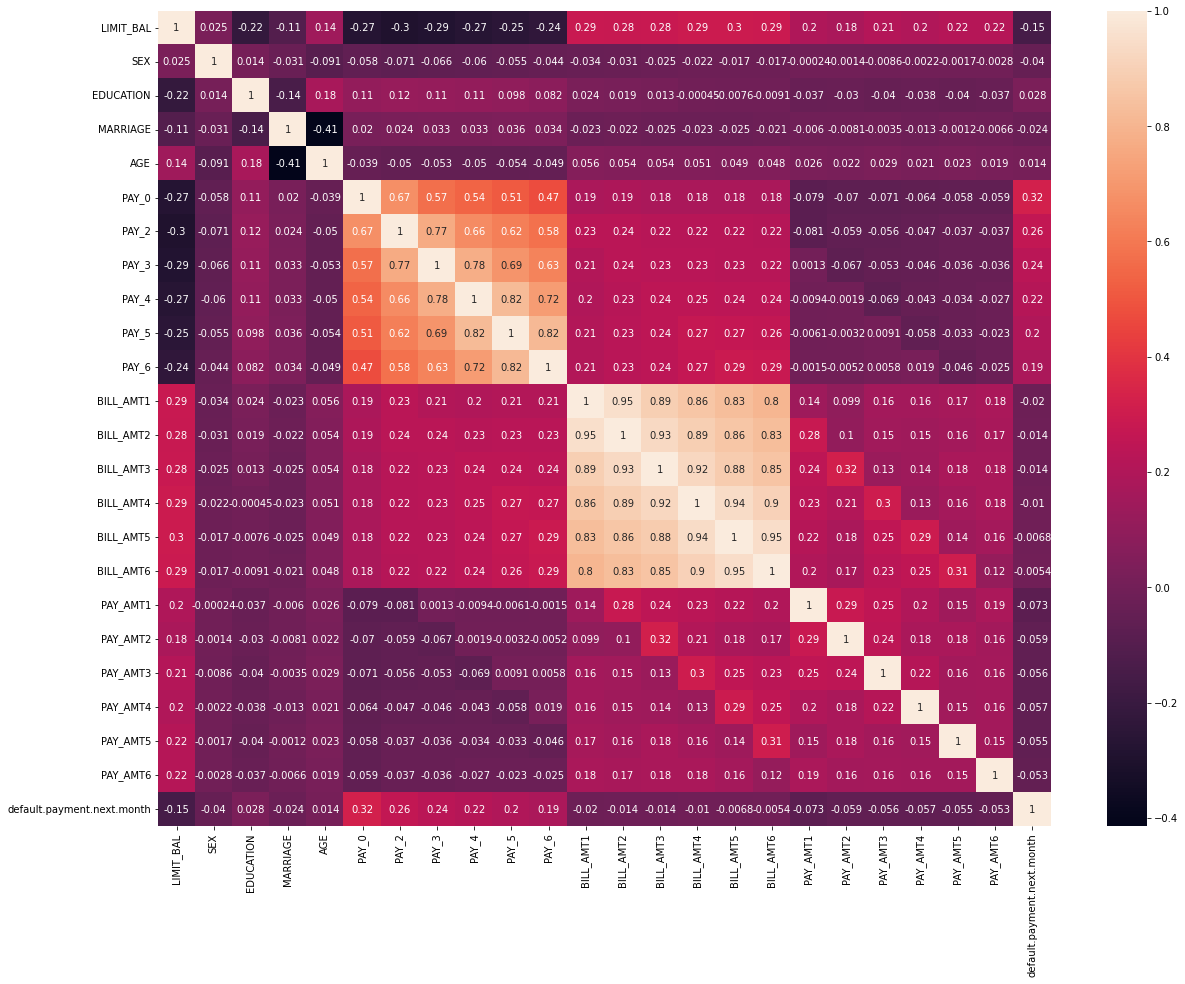

In [9]:
#Find the correlation among all the features
corr =data_clean("/content/drive/MyDrive/UCI_Credit_Card.csv.zip").corr()
plt.figure(figsize =(20,15))
sns.heatmap(corr,annot =True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


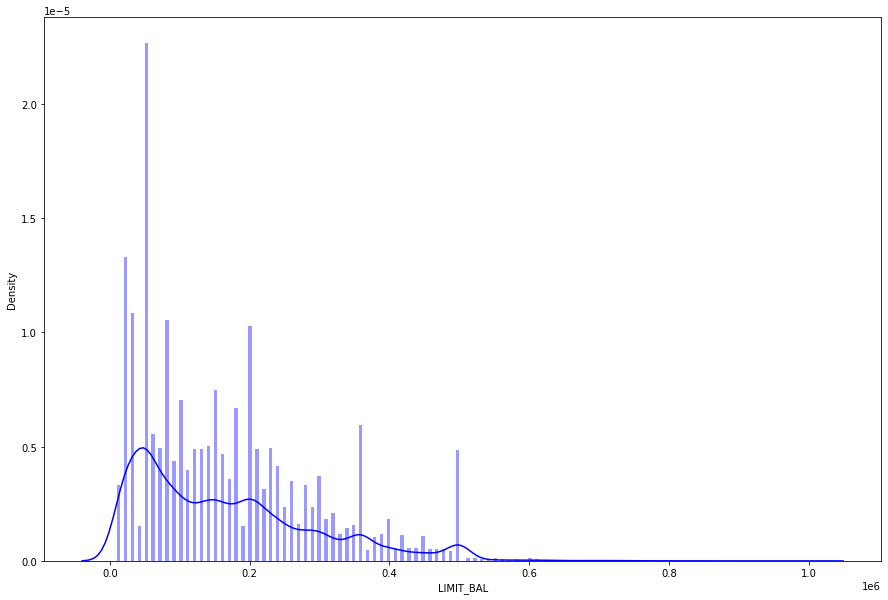

In [10]:
plt.figure(figsize =(15,10))
sns.distplot(data['LIMIT_BAL'],color ='blue',kde=True,bins=200)

Largest group amount of credit card are with limit amount of 50k.

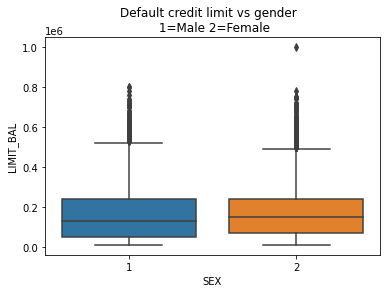

In [11]:
plt.title("Default credit limit vs gender  \n 1=Male 2=Female")
sns.boxplot(x ="SEX" ,y="LIMIT_BAL",data=data)
plt.show()

The credit limit balance is more are less balanced for both the gender.But the female have larger outliers than male with max value(1M NT dollars).


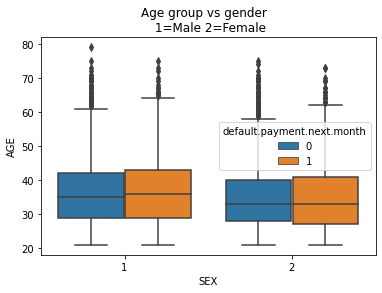

In [12]:
plt.title("Age group vs gender  \n 1=Male 2=Female")
sns.boxplot(x ="SEX" ,y="AGE",hue="default.payment.next.month" ,data=data)
plt.show()

The male have larger mean value and outliers when compared to female.

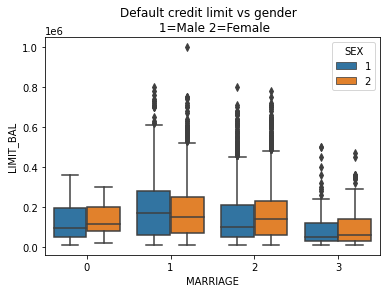

In [13]:
plt.title("Default credit limit vs gender  \n 1=Male 2=Female")
sns.boxplot(x ="MARRIAGE" ,y="LIMIT_BAL",hue ="SEX", data=data)
plt.show()

Married male have more credit limit balance than female.
The mean value for married male is larger than married female.
whereas in case of marital stauts as unmarried female have larger Q2 and  mean value than male

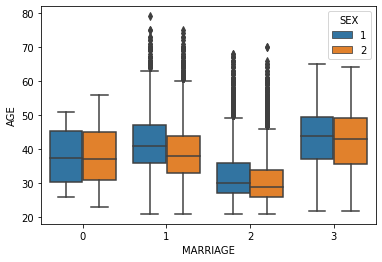

In [14]:
sns.boxplot(x="MARRIAGE", y="AGE", hue="SEX", data=data)
plt.show()

Marital status 3 have mean value above 40 and Q4 value above 60
Married male have higher mean value than married female.
Unmarried male have slightly higher mean value than unmarried female.
Similarly Q3 and Q4 values are higher in male than female in all marital status.

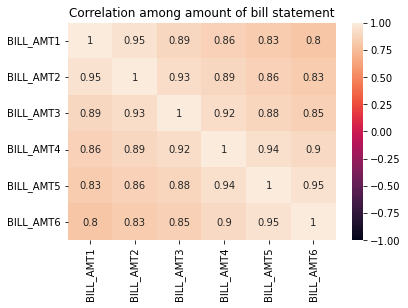

In [15]:
#Feature correlation among bill amount
var =['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
plt.title("Correlation among amount of bill statement")
corr =data[var].corr()
sns.heatmap(corr,vmin =-1, vmax=1,annot =True)
plt.show()


Correlation decreases with respect to intervals between month. (i.e The correlation value is lower between september and april)

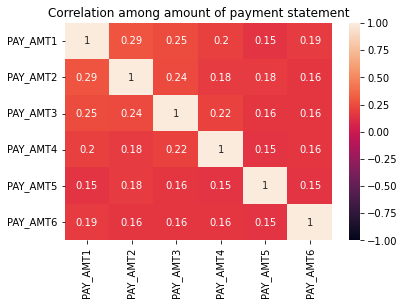

In [16]:
#Feature correlation among amount of previous payment
var =['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
plt.title("Correlation among amount of payment statement")
corr =data[var].corr()
sns.heatmap(corr,vmin =-1, vmax=1,annot =True)
plt.show()


It seems that there is no correlation among the amount of previous payments

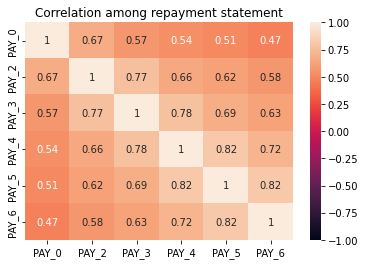

In [17]:
#Feature correlation among repayment status
var =['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
plt.title("Correlation among repayment statement")
corr =data[var].corr()
sns.heatmap(corr,vmin =-1, vmax=1,annot =True)
plt.show()


Correlation of repayment decreases among the interval between months

In [18]:
#Splitting the data into features and target
def splitting(v):
  split =data_clean(v)
  X =split.iloc[:,:-1]
  Y =split.iloc[:,-1]
  return {"Features":X,"Target":Y}

In [19]:
r =splitting("/content/drive/MyDrive/UCI_Credit_Card.csv.zip")
r["Features"]
#r["Target"]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [20]:
#Train the data 
def train_test(s):
  train_test_splitting =splitting(s)
  X_train,X_test,y_train,y_test= train_test_split(train_test_splitting["Features"],train_test_splitting["Target"],  test_size= 0.33,random_state =0)
  return {"X_Train":X_train,"X_Test":X_test,"Y_Train":y_train,"Y_Test":y_test}


In [21]:
#Feature scaling
def feature_scaling(features):
  feat =train_test(features)
  min_max_scaler =preprocessing.MinMaxScaler()
  X_after_min_max_scaler =min_max_scaler.fit_transform(feat['X_Train'])
  standardize =preprocessing.StandardScaler()
  X_after_standardise=standardize.fit_transform(feat['X_Train'])
  return({"X_std": X_after_standardise,"X_norm":X_after_min_max_scaler,"std":standardize,"normalize":min_max_scaler})

r=feature_scaling("/content/drive/MyDrive/UCI_Credit_Card.csv.zip")
r["X_norm"]


array([[2.15189873e-01, 0.00000000e+00, 1.66666667e-01, ...,
        1.28824477e-02, 3.67200847e-02, 1.51761476e-02],
       [4.93670886e-01, 1.00000000e+00, 3.33333333e-01, ...,
        8.53462158e-02, 4.22183054e-01, 7.08441542e-02],
       [2.91139241e-01, 1.00000000e+00, 1.66666667e-01, ...,
        0.00000000e+00, 1.81667788e-03, 7.58807382e-03],
       ...,
       [1.51898734e-01, 1.00000000e+00, 5.00000000e-01, ...,
        6.60225443e-03, 0.00000000e+00, 9.48509228e-03],
       [5.06329114e-02, 1.00000000e+00, 5.00000000e-01, ...,
        1.61030596e-03, 2.57684805e-03, 9.48509228e-04],
       [1.64556962e-01, 1.00000000e+00, 1.66666667e-01, ...,
        3.22061192e-03, 5.66906571e-03, 3.79403691e-03]])

In [22]:
#Model fitting
def model_fitting(v):
  model_fit =train_test(v)
  scaled =feature_scaling(v)
  RFC1 =RandomForestClassifier(random_state=0).fit(scaled["X_std"],model_fit["Y_Train"])
  RFC2 =RandomForestClassifier(random_state=0).fit(scaled["X_norm"],model_fit["Y_Train"])
  ADA1 =AdaBoostClassifier(random_state =0).fit(scaled["X_std"],model_fit["Y_Train"])
  ADA2 =AdaBoostClassifier(random_state =0).fit(scaled["X_norm"],model_fit["Y_Train"])
  return {"RFC_std":RFC1,"RFC_norm":RFC2,"ADA_std":ADA1,"ADA_norm":ADA2}

In [23]:
t =model_fitting("/content/drive/MyDrive/UCI_Credit_Card.csv.zip")
t["RFC_std"]

RandomForestClassifier(random_state=0)

In [24]:
#Predict the model
def predict(x):
  pred =model_fitting(x)
  scale =feature_scaling(x)
  splited =train_test(x)
  std1 =scale["std"].transform(splited["X_Test"])
  norm1 =scale["normalize"].transform(splited["X_Test"])
  rfc1 =pred["RFC_std"].predict(std1)
  rfc2 =pred["RFC_norm"].predict(norm1)
  ada1 =pred["ADA_std"].predict(std1)
  ada2 =pred["ADA_norm"].predict(norm1)
  return {"RFC_pred1":rfc1,"RFC_pred2":rfc2,"ADA_pred1":ada1,"ADA_pred2":ada2}

In [25]:
s =predict("/content/drive/MyDrive/UCI_Credit_Card.csv.zip")
s["RFC_pred1"]

array([1, 0, 0, ..., 0, 0, 0])

In [26]:
s["RFC_pred2"]

array([1, 0, 0, ..., 0, 0, 0])

In [27]:
s["ADA_pred1"]

array([1, 0, 0, ..., 0, 0, 1])

In [28]:
s["ADA_pred2"]

array([1, 0, 0, ..., 0, 0, 1])

In [29]:
#Evaluate the model
def evaluations(x):
  eval =predict(x)
  test =train_test(x)
  accur =accuracy_score(test["Y_Test"],eval["RFC_pred1"])
  accur1 =accuracy_score(test["Y_Test"],eval["RFC_pred2"])
  accur2 =accuracy_score(test["Y_Test"],eval["ADA_pred1"])
  accur3 =accuracy_score(test["Y_Test"],eval["ADA_pred2"])
  return {"Acc1":accur,"Acc2":accur1,"Acc3":accur2,"Acc4":accur3}

In [ ]:
s =evaluations("/content/drive/MyDrive/UCI_Credit_Card.csv.zip")
s["Acc1"]

In [ ]:
s["Acc2"]

In [ ]:
s["Acc3"]

In [ ]:
s["Acc4"]